In [1]:
import matplotlib.pyplot as plt
import pickle
import numpy as np
plt.style.use('seaborn')

In [2]:
with open("py_benchmark.pkl", "rb") as fp:
    results = pickle.load(fp)

In [3]:
results

{'500': array([0.00229859, 0.00192714, 0.00182939, 0.00183177, 0.00182056,
        0.00243878, 0.00303721, 0.00197768, 0.00195432, 0.0019567 ]),
 '1000': array([0.05761623, 0.05856943, 0.06004357, 0.05944037, 0.06014299,
        0.05979848, 0.0586009 , 0.05870438, 0.05855274, 0.05881929]),
 '5000': array([1.31155896, 1.32001972, 1.38537669, 1.33317876, 1.33635616,
        1.34290385, 1.34270477, 1.34525609, 1.35185528, 1.40607309]),
 '10000': array([4.94674897, 5.06258488, 5.00803065, 4.98136759, 4.94676757,
        5.01040101, 4.98637176, 4.95993805, 4.98216128, 4.95579195]),
 '20000': array([17.0342803 , 16.92019725, 16.80199742, 16.86960721, 16.80855346,
        16.73557115, 16.6926806 , 16.75355363, 16.69580865, 16.67901134])}

In [4]:
r_benchmark = {'500': np.array([8.472133,
8.432182,
8.381984,
8.450981,
8.740454,
8.428125,
8.699494,
8.658595,
8.861975,
8.483940 ]), '1000':np.array([37.00047      , 
36.5548     ,    
35.9411  ,       
36.21996  ,      
36.7648   ,      
36.85776   ,     
36.98183  ,      
37.06291   ,     
37.10034   ,     
36.45482 ]), '5000':np.array([1506.8568,
1507.452,
1506.3455]), '10000':np.array([5542.56,
5560.45,
5536.368,
                            5573.45,]), '20000':np.array([22075.456,
                                                         22025.9752,
                                                         22065.2583])}

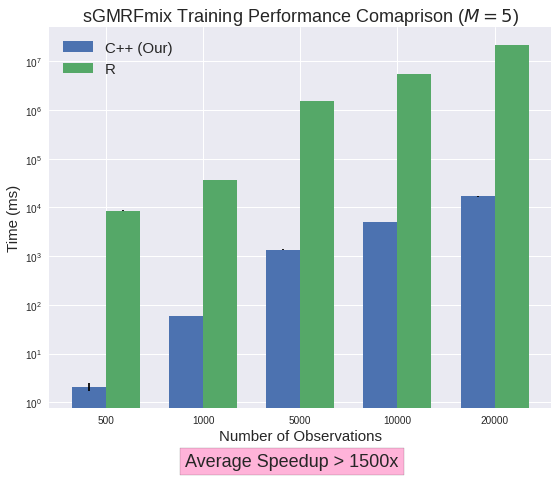

In [5]:
width = 0.35
fig, ax = plt.subplots(1,1, figsize=(9,7))
ax.bar(np.arange(len(results)) - width/2,
        [v.mean()*1000 for v in results.values()], 
        width,
        yerr = [v.std()*1000 for v in results.values()], 
        align='center',
        label='C++ (Our)')

ax.bar(np.arange(len(r_benchmark)) + width/2,
        [v.mean()*1000 for v in r_benchmark.values()], 
        width,
        yerr = [v.std()*1000 for v in r_benchmark.values()], 
        align='center',
        label='R')

ax.set_xticks(range(len(results)))
ax.set_xticklabels(list(results.keys()))
ax.set_ylabel('Time (ms)', fontsize=15)
ax.set_xlabel('Number of Observations', fontsize=15)
ax.set_title(r'sGMRFmix Training Performance Comaprison ($M = 5$)', fontsize=18)
ax.set_yscale('log')
ax.legend(fontsize=15)
plt.figtext(0.5, 0.01, f"Average Speedup > {1500}x", ha="center", fontsize=18, bbox={"facecolor":"hotpink", "alpha":0.5, "pad":5})
plt.savefig('sgmrf_training_comparison.png', dpi=250)
plt.show()

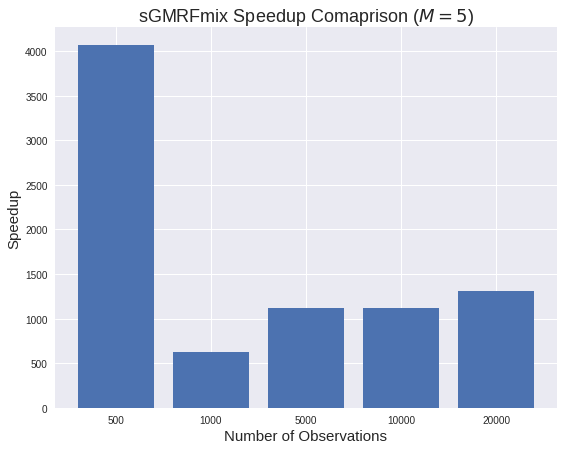

In [6]:
fig, ax = plt.subplots(1,1, figsize=(9,7))
ax.bar(range(len(results)),
       [v2.mean()/v1.mean()  for v1, v2 in zip(results.values(), r_benchmark.values())], 
#        yerr = [v.std()*1000 for v in results.values()], 
       align='center',
      label='C++ (Our)')
ax.set_xticks(range(len(results)))
ax.set_xticklabels(list(results.keys()))
ax.set_ylabel('Speedup', fontsize=15)
ax.set_xlabel('Number of Observations', fontsize=15)
ax.set_title(r'sGMRFmix Speedup Comaprison ($M = 5$)', fontsize=18)
# ax.set_yscale('log')
# ax.legend(fontsize=15)
plt.show()

In [7]:
ans = 0
for v1, v2 in zip(results.values(), r_benchmark.values()):
    ans += (v2.mean()/ v1.mean())
    print(v2.mean() / v1.mean(), v1.mean(), v2.mean())
ans/4

4062.701999483521 0.0021072149276733397 8.5609863
621.6262924969011 0.05902884006500244 36.693879
1118.2583131570702 1.347528338432312 1506.8847666666668
1114.2032021733446 4.984016370773316 5553.207
1312.8994350460584 16.79912610054016 22055.56316666667


2057.422310589224

In [8]:
with open("py_benchmark_infr.pkl", "rb") as fp:
    results_infr = pickle.load(fp)

In [9]:
results_infr

{'500': array([0.00022292, 0.00020766, 0.00020361, 0.00021291, 0.00020337,
        0.00022864, 0.0002079 , 0.00020862, 0.00020385, 0.00021672]),
 '1000': array([0.00015116, 0.00014663, 0.00017214, 0.00014758, 0.00014734,
        0.00014853, 0.00014782, 0.000144  , 0.0001514 , 0.00014806]),
 '5000': array([0.0005722 , 0.00058341, 0.00059199, 0.00062084, 0.00058866,
        0.0005796 , 0.00058842, 0.00058699, 0.00076389, 0.00060558]),
 '10000': array([0.00114655, 0.00110626, 0.00116658, 0.00113344, 0.0011847 ,
        0.00116539, 0.00115585, 0.00160098, 0.00118113, 0.00118184]),
 '20000': array([0.00235629, 0.00233078, 0.00231481, 0.00238466, 0.00230289,
        0.00231814, 0.00235176, 0.00253701, 0.00228333, 0.00230289])}

In [10]:
r_infr = {'500':np.array([0.01770139, 0.01792502]),
         '1000':np.array([0.09177613, 0.0250988]),
         '5000':np.array([0.1923325, 0.190352]),
         '10000':np.array([0.4265761, 0.4620733]),
         '20000':np.array([1.745167, 1.746347])}

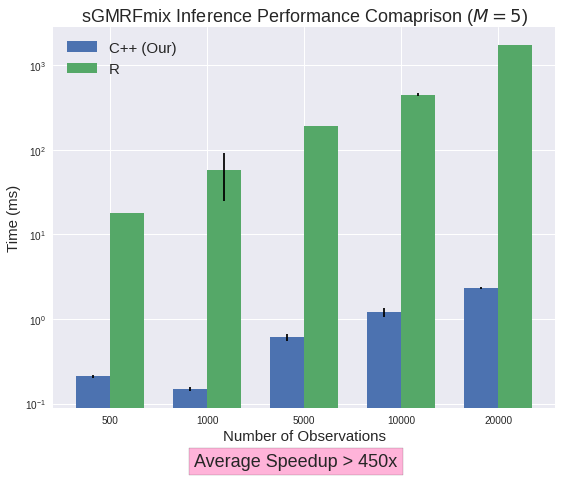

In [11]:
width = 0.35
fig, ax = plt.subplots(1,1, figsize=(9,7))
ax.bar(np.arange(len(results_infr)) - width/2,
        [v.mean()*1000 for v in results_infr.values()], 
        width,
        yerr = [v.std()*1000 for v in results_infr.values()], 
        align='center',
        label='C++ (Our)')

ax.bar(np.arange(len(r_benchmark)) + width/2,
        [v.mean()*1000 for v in r_infr.values()], 
        width,
        yerr = [v.std()*1000 for v in r_infr.values()], 
        align='center',
        label='R')

ax.set_xticks(range(len(results_infr)))
ax.set_xticklabels(list(results_infr.keys()))
ax.set_ylabel('Time (ms)', fontsize=15)
ax.set_xlabel('Number of Observations', fontsize=15)
ax.set_title(r'sGMRFmix Inference Performance Comaprison ($M = 5$)', fontsize=18)
ax.set_yscale('log')
ax.legend(fontsize=15)
plt.figtext(0.5, 0.01, f"Average Speedup > {450}x", ha="center", fontsize=18, bbox={"facecolor":"hotpink", "alpha":0.5, "pad":5})
plt.savefig('sgmrf_infr_comparison.png', dpi=250)
plt.show()

In [12]:
ans = 0
for v1, v2 in zip(results_infr.values(), r_infr.values()):
    ans += (v2.mean()/ v1.mean())
    print(v2.mean() / v1.mean(), v1.mean(), v2.mean())
ans/4

84.17530079351059 0.00021162033081054688 0.017813205
388.3766331791475 0.0001504659652709961 0.058437465
314.6258289728712 0.0006081581115722657 0.19134225
369.570441729391 0.0012022733688354492 0.4443247
743.4270017288538 0.0023482561111450194 1.745757


475.04380160094354

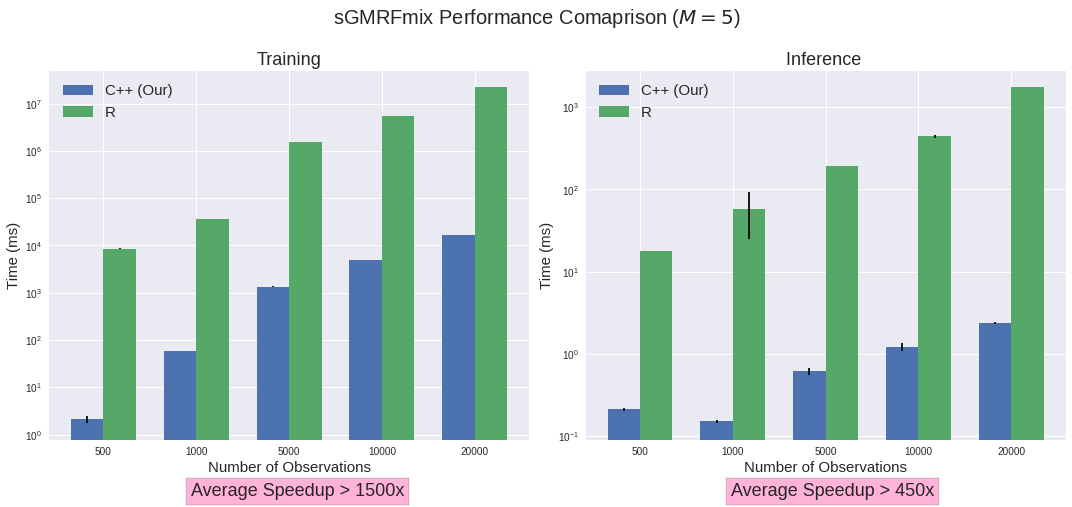

In [26]:
width = 0.35
fig, (ax, ax2) = plt.subplots(1,2, figsize=(15,7))
ax.bar(np.arange(len(results)) - width/2,
        [v.mean()*1000 for v in results.values()], 
        width,
        yerr = [v.std()*1000 for v in results.values()], 
        align='center',
        label='C++ (Our)')

ax.bar(np.arange(len(r_benchmark)) + width/2,
        [v.mean()*1000 for v in r_benchmark.values()], 
        width,
        yerr = [v.std()*1000 for v in r_benchmark.values()], 
        align='center',
        label='R')

ax.set_xticks(range(len(results)))
ax.set_xticklabels(list(results.keys()))
ax.set_ylabel('Time (ms)', fontsize=15)
ax.set_xlabel('Number of Observations', fontsize=15)
ax.set_title(r'Training', fontsize=18)
ax.set_yscale('log')
ax.legend(fontsize=15)
plt.figtext(0.18, 0.01, f"Average Speedup > {1500}x", ha="left", fontsize=18, bbox={"facecolor":"hotpink", "alpha":0.5, "pad":5})

ax2.bar(np.arange(len(results_infr)) - width/2,
        [v.mean()*1000 for v in results_infr.values()], 
        width,
        yerr = [v.std()*1000 for v in results_infr.values()], 
        align='center',
        label='C++ (Our)')

ax2.bar(np.arange(len(r_benchmark)) + width/2,
        [v.mean()*1000 for v in r_infr.values()], 
        width,
        yerr = [v.std()*1000 for v in r_infr.values()], 
        align='center',
        label='R')

ax2.set_xticks(range(len(results_infr)))
ax2.set_xticklabels(list(results_infr.keys()))
ax2.set_ylabel('Time (ms)', fontsize=15)
ax2.set_xlabel('Number of Observations', fontsize=15)
ax2.set_title(r'Inference ', fontsize=18)
ax2.set_yscale('log')
ax2.legend(fontsize=15)
plt.figtext(0.68, 0.01, f"Average Speedup > {450}x", ha="left", fontsize=18, bbox={"facecolor":"hotpink", "alpha":0.5, "pad":5})
plt.suptitle(r"sGMRFmix Performance Comaprison ($M = 5$)", fontsize=20)
fig.tight_layout(rect=[0, 0.03, 1, 0.98])
plt.savefig('sgmrf_comparison.png', dpi=250,  bbox_inches = "tight")
plt.show()